In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,recall_score, f1_score
import matplotlib.pyplot as plt

In [14]:
#Importing the dataset containing 3000 examples
data=pd.read_excel('datamining_dataset (3).xlsx')

In [15]:
data.head()

,empid,Buisness Travel,Work Accident,Department Name,Gender,No. Of projects,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,User behaviour(Unusual websites),PerformanceRating,Last evaluation score,Promotion in last 5 years,Class_Label: Will emp leave company?
0,1,Travel_Rarely,1,Operations,Female,3,4,19479,8,8,3,1,0,No
1,2,Travel_Frequently,0,Operations,Male,2,2,24907,1,1,4,4,1,No
2,3,Travel_Rarely,0,Other,Male,2,3,2396,6,6,3,2,0,No
3,4,Travel_Frequently,0,Operations,Female,3,3,23159,1,1,3,3,1,No
4,5,Travel_Rarely,0,Finance,Male,3,2,16632,9,9,3,4,1,Yes


In [16]:
#Performing basic data cleaning by dropping redundant/ less relevant columns
data.drop(['empid','Buisness Travel','Department Name','Gender'], axis=1, inplace= True)

In [17]:
data.head()

,Work Accident,No. Of projects,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,User behaviour(Unusual websites),PerformanceRating,Last evaluation score,Promotion in last 5 years,Class_Label: Will emp leave company?
0,1,3,4,19479,8,8,3,1,0,No
1,0,2,2,24907,1,1,4,4,1,No
2,0,2,3,2396,6,6,3,2,0,No
3,0,3,3,23159,1,1,3,3,1,No
4,0,3,2,16632,9,9,3,4,1,Yes


In [18]:
#Transforming the dataset using NumPy into two 2-D arrays, with 'x' containing 8 features and 'y' is the label class
arr=data.values
x=arr[:,0:9]
y=arr[:,9]

In [19]:
arr

array([[1, 3, 4, ..., 1, 0, 'No'],
       [0, 2, 2, ..., 4, 1, 'No'],
       [0, 2, 3, ..., 2, 0, 'No'],
       ...,
       [1, 1, 3, ..., 2, 0, 'No'],
       [0, 3, 1, ..., 2, 1, 'No'],
       [0, 2, 3, ..., 4, 1, 'No']], dtype=object)

In [20]:
x

array([[1, 3, 4, ..., 3, 1, 0],
       [0, 2, 2, ..., 4, 4, 1],
       [0, 2, 3, ..., 3, 2, 0],
       ...,
       [1, 1, 3, ..., 4, 2, 0],
       [0, 3, 1, ..., 3, 2, 1],
       [0, 2, 3, ..., 3, 4, 1]], dtype=object)

In [21]:
y

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [22]:
#To perform the preprocessing, 'Label Encoder' module has been used
le = preprocessing.LabelEncoder()

In [23]:
#The label data is transformed into 0s(No) and 1s(Yes): Will employee leave company?
y=le.fit_transform(y)

In [24]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [25]:
#Training the data using the 'train_test_split' library imported from scikit learn
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25,random_state=7)

In [26]:
#Decision Tree classifier has been applied, using 'Gini Index' for attribute selection, rest feaures are auto selected
clf=tree.DecisionTreeClassifier(criterion='gini',min_samples_split=30,splitter="best")

In [27]:
#Training the dataset
clf = clf.fit(x_train,y_train)

In [28]:
#Predicting the values
y_pred = clf.predict(x_test)

In [29]:
#Checking if all values in the output array are binary(0 or 1)
np.unique(y_pred)

array([0, 1], dtype=int64)

In [30]:
#Calculating the accuracy
accuracy = accuracy_score(y_test,y_pred)

In [31]:
accuracy

0.9146666666666666

In [32]:
#Calculating Recall
recall_score(y_test, y_pred, average='macro')

0.5705584580818062

In [33]:
#For the dataset we used,'f1 score' is the most suitable performance metric since the data has very few impurities i.e. 
#the number of employees churning are very few as compared to the employees not leaving
f1_score(y_test, y_pred,average='weighted')

0.902901005653216

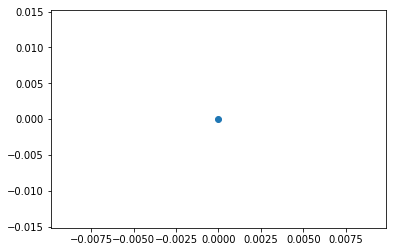

In [34]:
plt.scatter(y_test[10],y_pred[10])